In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [ ]:
path = "/mnt/c/Users/olivi/OneDrive - Amherst College/6 Summer 2025/surface-detection"

##### 128x2 Variable Threshold Sequence Dataset

In [ ]:
thresholds = [
    [25, 26, 27, 28, 28],
    [21, 17, 21, 20, 21],
    [19, 14, 22, 25, 25],
    [25, 22, 27, 24, 27],
    [24, 22, 24, 26, 25]
]

counts = [
    [156, 145, 154, 160, 142], # User 1
    [149, 130, 156, 136, 120], # User 2
    [142, 103, 142, 152, 137], # User 3
    [145, 144, 159, 149, 142], # User 4
    [137, 138, 136, 124, 134]  # User 5
]

locations = ["A", "B", "C", "D", "E"]
labels = ["User 1", "User 2", "User 3", "User 4", "User 5"]

In [ ]:
def dataset_barplot(split, title=""):
    colors = plt.get_cmap('Set3').colors

    split = np.array(split)
    x = np.arange(5)

    fig, ax = plt.subplots()
    bottom = np.zeros(5)
    for i, row in enumerate(split):
        ax.bar(x, row, bottom=bottom, label=labels[i], color = colors[i])
        bottom += row 

    ax.set_xticks(x)
    ax.set_xticklabels(locations)
    ax.set_xlabel("Location")
    ax.set_ylabel("Number of Sequences")

    # ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=5)
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
    ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    
    plt.title(title)
    plt.show()

In [ ]:
# counts: stacked barplot
dataset_barplot(counts)

# thresholds: line plot
colors = plt.get_cmap('Set3').colors
for i in range(5):
    plt.plot(locations, thresholds[i], label=labels[i], color = colors[i])
plt.legend()
plt.xlabel("Location")
plt.ylabel("Peak Acceleration Threshold")
plt.show()

##### Single sequence (normalized)

In [ ]:
def sequence_norm(user=1, location="A", instance=1):
    A1 = pd.read_csv(f"{path}/sequences/varied-threshold/User{user}_Location{location}_Normal_{instance}.dat", header=None)
    plt.plot(list(range(1, 129)), A1[0] / A1[0].max(), label='acceleration')
    plt.plot(list(range(1, 129)), A1[1] / A1[1].max(), color='red', label="Gyroscope")
    plt.title("Normalized Accelerometer, Gyroscope for Sequence")
    plt.legend()
    plt.show()

sequence_norm()

##### Dataset split visualization

In [ ]:
# load dataset partitions, filenames
lines = []
with open(f"{path}/sequences/filenames.txt", 'r') as filenames:
    lines = filenames.readlines()

In [ ]:
def split_barplot(filepath, title):
    indices = []
    with open(filepath) as f:
        indices = f.readlines()
    counts = [[0 for i in range(0, 5)] for j in range(0, 5)] # initialize to zeros
    for i in indices:
        user = 0
        match lines[int(i.strip())-1].split('_')[0]:
            case "User1" : user = 0
            case "User2" : user = 1
            case "User3" : user = 2
            case "User4" : user = 3
            case "User5" : user = 4
        match lines[int(i.strip())-1].split('_')[1]:
            case "LocationA" : counts[user][0] += 1
            case "LocationB" : counts[user][1] += 1
            case "LocationC" : counts[user][2] += 1
            case "LocationD" : counts[user][3] += 1
            case "LocationE" : counts[user][4] += 1
    dataset_barplot(counts, title)

In [ ]:
split_barplot(f"{path}/logs/ver2_dataset_train_2.txt", "Training Set")
split_barplot(f"{path}/logs/ver2_dataset_val_2.txt", "Validation Set")
split_barplot(f"{path}/logs/ver2_dataset_test_2.txt", "Test Set")

##### Confusion heatmap

In [ ]:
nn = "ver2"
train = pd.read_csv(f"{path}/logs/{nn}_accuracy_train_2.txt")
val = pd.read_csv(f"{path}/logs/{nn}_accuracy_val_2.txt")
test = pd.read_csv(f"{path}/logs/{nn}_accuracy_test_2.txt")

In [ ]:
# confusion matrix heatmap, normalized over true (rows)
def confusion_heatmap(set=train, netname="Ver3", setname="Training"):
    sklearn.metrics.ConfusionMatrixDisplay.from_predictions(set["True"], set["Predicted"], 
                                                            cmap='cividis', 
                                                            display_labels=["A", "B", "C", "D", "E"],
                                                            normalize="true")
    plt.xlabel("Predicted location")
    plt.ylabel("True location")
    plt.title(f"{netname} Predictions on {setname} set")
    plt.show()

In [ ]:
confusion_heatmap(train, "Ver2", "Training")
confusion_heatmap(val, "Ver2", "Validation")
confusion_heatmap(test, "Ver2", "Test")

In [11]:
A = pd.read_csv("training.csv")
B = pd.read_csv("validation.csv")

In [12]:
B

,Iteration,Loss,Accuracy
0,0,1.612886,18.644068
1,50,1.611152,18.644068
2,100,1.608375,21.186441
3,150,1.609562,20.338984
4,200,1.609044,20.621469
...,...,...,...
72,3600,1.608359,21.186441
73,3650,1.608400,21.186441
74,3700,1.608384,21.186441
75,3750,1.608355,21.186441


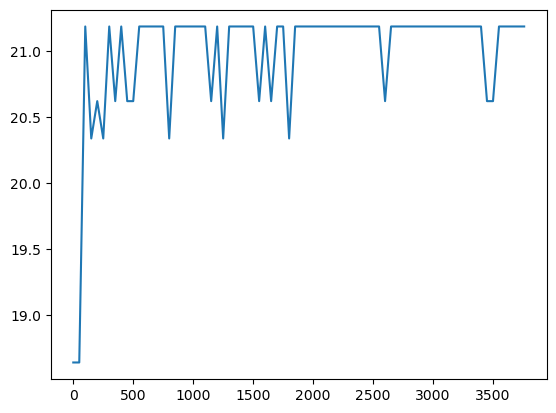

In [14]:
plt.plot(B["Iteration"], B["Accuracy"])